In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Exchange Rate Forecasting Project/Dataset/USD_GBP.csv")

In [4]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,02/28/2025,0.7949,0.7937,0.7963,0.7922,NaN,0.17%
1,02/27/2025,0.7935,0.7889,0.7939,0.7880,NaN,0.58%
2,02/26/2025,0.7890,0.7896,0.7915,0.7863,NaN,-0.05%
3,02/25/2025,0.7893,0.7921,0.7933,0.7887,NaN,-0.34%
4,02/24/2025,0.7920,0.7906,0.7930,0.7879,NaN,0.06%
...,...,...,...,...,...,...,...
3951,01/07/2010,0.6274,0.6245,0.6290,0.6226,NaN,0.54%
3952,01/06/2010,0.6240,0.6253,0.6275,0.6224,NaN,-0.18%
3953,01/05/2010,0.6251,0.6214,0.6263,0.6189,NaN,0.64%
3954,01/04/2010,0.6211,0.6200,0.6228,0.6156,NaN,0.44%


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date').reset_index(drop=True)
df['Change %'] = df['Change %'].str.replace('%', '').astype(float)
df.drop(columns=['Vol.'], inplace=True)

In [6]:
df

,Date,Price,Open,High,Low,Change %
0,2010-01-01,0.6184,0.6188,0.6193,0.6183,-0.10
1,2010-01-04,0.6211,0.6200,0.6228,0.6156,0.44
2,2010-01-05,0.6251,0.6214,0.6263,0.6189,0.64
3,2010-01-06,0.6240,0.6253,0.6275,0.6224,-0.18
4,2010-01-07,0.6274,0.6245,0.6290,0.6226,0.54
...,...,...,...,...,...,...
3951,2025-02-24,0.7920,0.7906,0.7930,0.7879,0.06
3952,2025-02-25,0.7893,0.7921,0.7933,0.7887,-0.34
3953,2025-02-26,0.7890,0.7896,0.7915,0.7863,-0.05
3954,2025-02-27,0.7935,0.7889,0.7939,0.7880,0.58


In [7]:
features = ['Price', 'Open', 'High', 'Low', 'Change %']
df[features].describe()

,Price,Open,High,Low,Change %
count,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000
mean,0.718198,0.718181,0.721344,0.715246,0.007925
std,0.075953,0.076037,0.076676,0.075397,0.559313
min,0.582600,0.582500,0.583500,0.581600,-3.030000
25%,0.641600,0.641500,0.644100,0.638900,-0.310000
50%,0.734250,0.734550,0.736900,0.731800,0.000000
75%,0.784300,0.784400,0.787100,0.781125,0.310000
max,0.935500,0.935800,0.963000,0.922500,8.760000


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3956 entries, 0 to 3955
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      3956 non-null   datetime64[ns]
 1   Price     3956 non-null   float64       
 2   Open      3956 non-null   float64       
 3   High      3956 non-null   float64       
 4   Low       3956 non-null   float64       
 5   Change %  3956 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 185.6 KB
None


In [9]:
print(df.isnull().sum())

Date        0
Price       0
Open        0
High        0
Low         0
Change %    0
dtype: int64


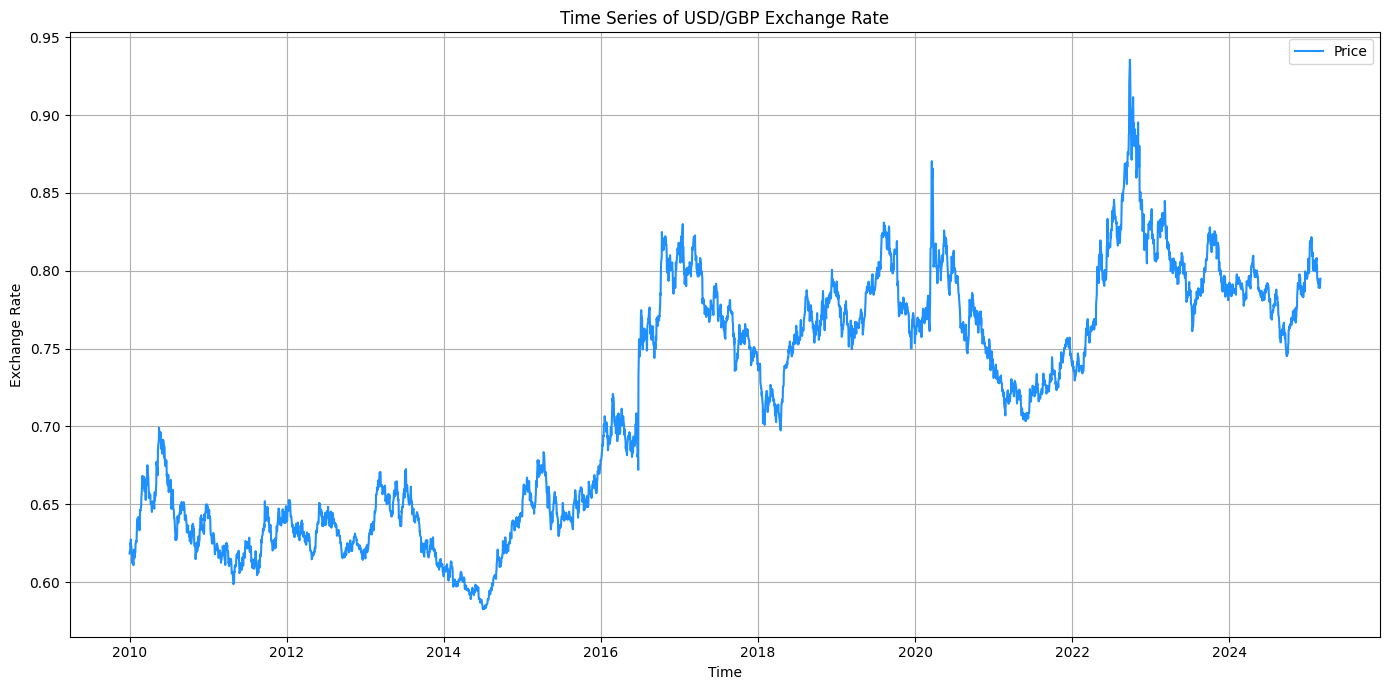

In [11]:
# Vẽ biểu đồ xu hướng giá theo thời gian
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Price'], label='Price', color='dodgerblue')
plt.title("Time Series of USD/GBP Exchange Rate")
plt.xlabel("Time")
plt.ylabel("Exchange Rate")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [10]:
train_size = int(0.8 * len(df))
train_df = df.iloc[:train_size].copy()
test_df = df.iloc[train_size:].copy()

In [ ]:
print(f" Train size: {train_df.shape}")
print(f" Test size: {test_df.shape}")

 Train size: (3164, 6)
 Test size: (792, 6)


In [ ]:
train_df.to_csv("/content/drive/MyDrive/Exchange Rate Forecasting Project/Train-Test Split Dataset/USD_GBP/train_data_USD_GBP.csv", index=False)
test_df.to_csv("/content/drive/MyDrive/Exchange Rate Forecasting Project/Train-Test Split Dataset/USD_GBP/test_data_USD_GBP.csv", index=False)
